# **Módulo 3: Visualización de datos interactivos**

En este módulo, exploraremos la visualización de datos, una herramienta esencial para transformar grandes volúmenes de información en representaciones visuales claras y útiles para la toma de decisiones. A través de gráficos y visualizaciones, podremos identificar patrones, tendencias y relaciones en los datos, facilitando la comunicación y el análisis.

Comenzaremos con un enfoque fundamental: el **tratamiento de datos faltantes y atípicos**. Aprenderemos a identificar y manejar estos problemas comunes que pueden afectar la calidad y precisión de nuestras visualizaciones. Un manejo adecuado de estos datos es crucial para asegurar que nuestras representaciones visuales sean confiables y significativas.

A continuación, avanzaremos hacia la **visualización interactiva**, que nos permitirá desarrollar gráficos dinámicos y personalizables, mejorando la interacción y el análisis de datos.

Seguiremos con la **visualización de datos a través de capas**, una biblioteca que ofrece una forma intuitiva de crear gráficos complejos mediante una sintaxis declarativa. Este enfoque facilita la combinación y superposición de diferentes tipos de visualizaciones para obtener una comprensión más profunda de los datos.

También profundizaremos en la **visualización interactiva de datos geográficos**, una habilidad clave para realizar análisis espaciales y desarrollar soluciones que consideren la ubicación geográfica.

Finalmente, introduciremos **Dash**, una herramienta potente y de fácil uso para crear aplicaciones web interactivas centradas en la visualización de datos. Con Dash, aprenderás a transformar scripts de Python en aplicaciones web completamente funcionales, permitiéndote combinar todas las técnicas de visualización vistas en el módulo en una interfaz interactiva y accesible para el usuario final.

Al completar este módulo, contarás con un conjunto sólido de habilidades para crear visualizaciones de datos desde cero, manejar datos atípicos y faltantes, y desarrollar aplicaciones visuales interactivas que sean impactantes y útiles.

## **Tratamiento de datos faltantes y atípicos**

### **Introducción**
En esta sección se enumeran y explican los posibles errores que pueden surgir durante diversas etapas del proceso de visualización de datos, tales como **la representación de elementos no correlacionados** para sugerir una relación o **la incorporación de características interactivas inadecuadas**.

Aunque el proceso de visualización de datos puede parecer sencillo **tomar algunos datos, trazar gráficos y añadir funciones interactivas** en realidad es fácil cometer errores en diferentes fases del mismo. Estos errores pueden resultar en visualizaciones defectuosas que no logran comunicar de manera clara y eficaz la información contenida en los datos, lo que las convierte en herramientas inútiles para el público al que van dirigidas.

### **Tratamiento de valores faltantes**

* Los datos perdidos son, como su nombre indica, valores que están en blanco (**NaN**, -, **0** cuando no deberían ser **0**, etc.). Al igual que los valores atípicos, los valores perdidos pueden ser problemáticos tanto en el caso de las visualizaciones como en el de los modelos predictivos.

* Los valores faltantes en las visualizaciones pueden mostrar una tendencia que en realidad no existe o no representa una relación entre dos variables que, en realidad, es significativa. Aunque es posible crear visualizaciones con un conjunto de datos que contenga valores perdidos, no se recomienda hacerlo. Al hacerlo, se ignoran los casos en los que se encuentran esos valores perdidos, creando así una visualización basada en algunos de los datos pero no en todos.

* Por lo tanto, el tratamiento de los valores perdidos es de suma importancia. Existen dos enfoques principales para tratar los valores perdidos: **la supresión y la imputación**.

Este conjunto de datos contiene información relacionada con los **empleos de profesionales de datos**, recopilada durante varios años. Cada fila representa un empleo único y proporciona detalles sobre el puesto, nivel de experiencia, modalidad de trabajo, ubicación del empleado, y otros factores relevantes para el contexto laboral y el salario recibido. Este conjunto de datos es útil para analizar tendencias en el mercado laboral de la ciencia de datos, permitiendo comparaciones entre diferentes tipos de empleos, niveles de experiencia, y ubicaciones geográficas.

**Descripción de las columnas**

| **Columna**               | **Descripción**                                                                                   | **Tipo de dato** |
|---------------------------|---------------------------------------------------------------------------------------------------|------------------|
| **Working_Year**           | Año en que se obtuvieron los datos sobre el empleo. Esto puede ser útil para observar tendencias a lo largo del tiempo. | Float            |
| **Designation**            | Título del puesto del profesional de datos. Ejemplos comunes incluyen "Data Scientist", "Data Engineer", etc. | Cadena           |
| **Experience**             | Nivel de experiencia del empleado en el puesto, categorizado como "Medio", "Senior", etc. Esto ayuda a segmentar los trabajos según la experiencia necesaria. | Cadena           |
| **Employment_Status**      | Tipo de contrato laboral bajo el cual se emplea a la persona. Puede ser a tiempo completo ("FT"), medio tiempo ("PT"), entre otros. Es un indicador de la estabilidad y dedicación del empleo. | Cadena           |
| **Employee_Location**      | País donde se encuentra ubicado el empleado. Esto puede influir en el salario y las condiciones laborales, dada la variación entre mercados internacionales. | Cadena           |
| **Company_Size**           | Tamaño de la empresa en la que trabaja el profesional de datos. Las empresas se clasifican en "S" (Pequeña), "M" (Mediana), o "L" (Grande), y esto puede influir en las oportunidades de crecimiento, ambiente de trabajo, y remuneración. | Cadena           |
| **Remote_Working_Ratio**   | Porcentaje de tiempo que el empleado trabaja de manera remota. Un valor del 100% indicaría que el empleo es completamente remoto, mientras que un valor del 0% indicaría un empleo presencial. | Entero           |
| **Salary_USD**             | Salario anual del empleado expresado en dólares estadounidenses (USD). Este valor es útil para hacer comparaciones salariales entre empleos de diferentes ubicaciones y niveles de experiencia. | Float            |


In [1]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV proporcionado
file_path = '_data/dataviz/ds_salaries.csv'
df = pd.read_csv(file_path)

In [2]:
# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          595 non-null    float64
 1   Designation           600 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            597 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 38.1+ KB


In [3]:
# Copia del dataset
df_va = df.copy()

# Revisar los datos faltantes en el conjunto de datos
missing_values = df_va .isnull().sum()

# Calcular el porcentaje de valores faltantes
missing_percentage = (df_va .isnull().mean() * 100).round(2)

# Crear un DataFrame con el análisis de datos faltantes
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante (%)': missing_percentage
})

missing_data


Valores Faltantes  Porcentaje Faltante (%)
Working_Year                         12                     1.98
Designation                           7                     1.15
Experience                            0                     0.00
Employment_Status                     0                     0.00
Employee_Location                     0                     0.00
Company_Size                          0                     0.00
Remote_Working_Ratio                  0                     0.00
Salary_USD                           10                     1.65

Hay varias formas de tratar los datos faltantes. Como modo de ejemplo, se explicaran los procesos de cada uno.

#### **Eliminación de datos faltantes** 

La estrategia **eliminar valores faltantes** implica quitar aquellas filas de tu conjunto de datos que contienen valores faltantes (`NaN`). Sin embargo, para evitar eliminar demasiados datos y reducir significativamente el tamaño del conjunto de datos, esta estrategia se aplica solo cuando los valores faltantes constituyen un pequeño porcentaje del total, en este caso, el **5% o menos**.

* **5% o menos del total de valores**: Si la cantidad de valores faltantes en una columna o fila representa el 5% o menos del total de registros, es una pérdida aceptable de información. Por lo tanto, puedes eliminar esas filas o columnas sin comprometer demasiado la integridad del análisis.

In [275]:
# Coloquemos un umbral
umbral = len(df_va) * 0.05

# Selecciona columnas con valores faltantes <= umbral
cols_to_drop = df_va .columns[df_va .isna().sum() <= umbral]

# Elimina filas con valores faltantes en las columnas seleccionadas
df_va.dropna(subset=cols_to_drop, inplace=True)

In [276]:
# informacion del dataset ajustado
df_va .info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          578 non-null    float64
 1   Designation           578 non-null    object 
 2   Experience            578 non-null    object 
 3   Employment_Status     578 non-null    object 
 4   Employee_Location     578 non-null    object 
 5   Company_Size          578 non-null    object 
 6   Remote_Working_Ratio  578 non-null    int64  
 7   Salary_USD            578 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 40.6+ KB


In [277]:
# Revisar los datos faltantes en el conjunto de datos
missing_values = df_va.isnull().sum()

# Calcular el porcentaje de valores faltantes
missing_percentage = (df_va.isnull().mean() * 100).round(2)

# Crear un DataFrame con el análisis de datos faltantes
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante (%)': missing_percentage
})

missing_data

Valores Faltantes  Porcentaje Faltante (%)
Working_Year                          0                      0.0
Designation                           0                      0.0
Experience                            0                      0.0
Employment_Status                     0                      0.0
Employee_Location                     0                      0.0
Company_Size                          0                      0.0
Remote_Working_Ratio                  0                      0.0
Salary_USD                            0                      0.0

Otra forma para eliminar los datos faltantes es:

In [8]:
# copia del dataset
df_2 = df.copy()

# eliminar las filas con Nans
df_clean = df_2.dropna(axis=0)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          578 non-null    float64
 1   Designation           578 non-null    object 
 2   Experience            578 non-null    object 
 3   Employment_Status     578 non-null    object 
 4   Employee_Location     578 non-null    object 
 5   Company_Size          578 non-null    object 
 6   Remote_Working_Ratio  578 non-null    int64  
 7   Salary_USD            578 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 40.6+ KB


In [ ]:
# Revisar los datos faltantes en el conjunto de datos
missing_values = df_clean.isnull().sum()

# Calcular el porcentaje de valores faltantes
missing_percentage = (df_clean.isnull().mean() * 100).round(2)

# Crear un DataFrame con el análisis de datos faltantes
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante (%)': missing_percentage
})

missing_data

Valores Faltantes  Porcentaje Faltante (%)
Working_Year                          0                      0.0
Designation                           0                      0.0
Experience                            0                      0.0
Employment_Status                     0                      0.0
Employee_Location                     0                      0.0
Company_Size                          0                      0.0
Remote_Working_Ratio                  0                      0.0
Salary_USD                            0                      0.0

Hay una diferencia muy importante entre ambos método; el **primer enfoque es más flexible y te permite manejar datos faltantes de manera más controlada**, mientras que el segundo es **más directo y elimina todas las filas que tengan valores faltantes**.

#### **Comparación de variables con la original y la data limpia**

Si nosotros realizamos la eliminación de datos o la imputación de datos debemos tener en cuenta que las distribuciones no cambien.

##### **Datos categóricos**

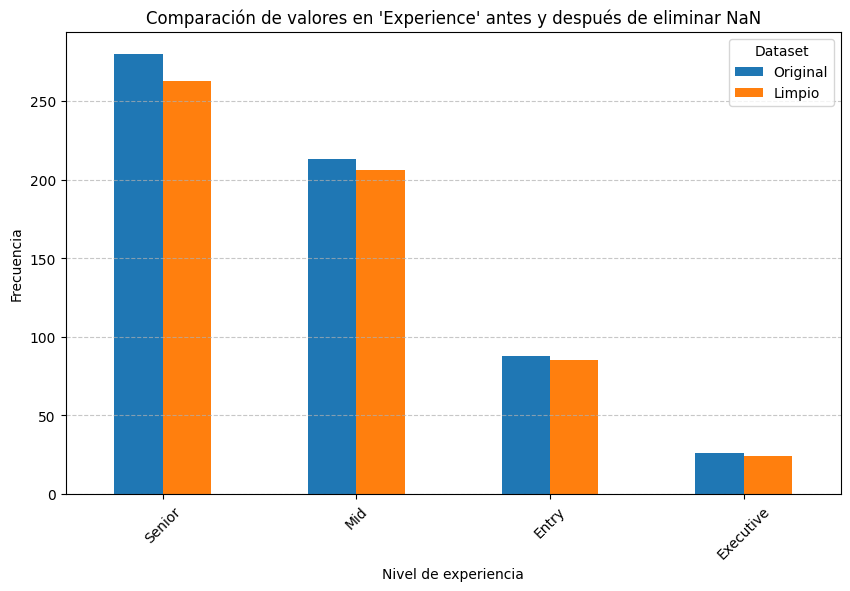

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar frecuencias en cada DataFrame
original_counts = df['Experience'].value_counts()
clean_counts = df_clean['Experience'].value_counts()

# Unir ambos conteos en un solo DataFrame
comparison = pd.concat(
    [original_counts.rename("Original"), clean_counts.rename("Limpio")],
    axis=1
).fillna(0)

# Crear gráfico de barras agrupado
comparison.plot(kind='bar', figsize=(10, 6))

plt.title("Comparación de valores en 'Experience' antes y después de eliminar NaN")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

* Visualmente vemos que no hay diferencias entre las proporciones, pero para estar más seguros realizaremos una prueba estadística $\chi^2$

In [11]:
from scipy.stats import chi2_contingency

# Alinear categorías para evitar errores
comparison_table = pd.concat([original_counts, clean_counts], axis=1, keys=['Original', 'Limpio']).fillna(0)

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(comparison_table.T)

# Mostrar resultados
print("Prueba Chi-cuadrado de homogeneidad")
print("Estadístico chi²:", chi2)
print("Grados de libertad:", dof)
print("Valor p:", p)

if p < 0.05:
    print("✅ Existen diferencias significativas en las proporciones entre los dos conjuntos.")
else:
    print("❌ No se encontraron diferencias significativas en las proporciones entre los dos conjuntos.")

Prueba Chi-cuadrado de homogeneidad
Estadístico chi²: 0.07153479107112373
Grados de libertad: 3
Valor p: 0.9950192620159025
❌ No se encontraron diferencias significativas en las proporciones entre los dos conjuntos.


##### **Datos numérico**



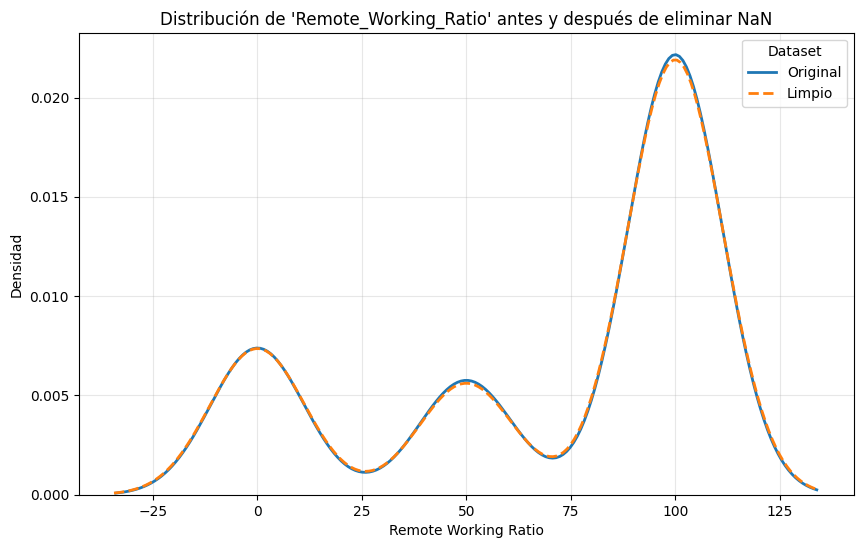

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Remote_Working_Ratio'], label='Original', linewidth=2)
sns.kdeplot(df_clean['Remote_Working_Ratio'], label='Limpio', linewidth=2, linestyle='--')

plt.title("Distribución de 'Remote_Working_Ratio' antes y después de eliminar NaN")
plt.xlabel("Remote Working Ratio")
plt.ylabel("Densidad")
plt.legend(title="Dataset")
plt.grid(alpha=0.3)
plt.show()


* Al ver las gráficas de densidad no se ven cambios en las curvas. Pero hagamos una prueba de Kolmogorov para ver si hay diferencia o no en las distribuciones

In [16]:
# PRUEBA KS 
from scipy.stats import ks_2samp

stat, p_value = ks_2samp(df['Remote_Working_Ratio'], df_clean['Remote_Working_Ratio'])

print("Prueba Kolmogorov-Smirnov (KS) para 'Remote_Working_Ratio' ")
print("Estadístico KS:", stat)
print("Valor p:", p_value)
if p_value < 0.05:
    print("✅ Hay diferencias significativas entre las dos distribuciones.")
else:
    print("❌ No hay evidencia significativa de que las distribuciones sean diferentes.")

Prueba Kolmogorov-Smirnov (KS) para 'Remote_Working_Ratio' 
Estadístico KS: 0.0018469641951169458
Valor p: 1.0
❌ No hay evidencia significativa de que las distribuciones sean diferentes.


#### **Imputación de datos faltantes**

##### **Datos categóricos**
Para los datos categóricos (como "País", "Categoría", "Género", etc.), los métodos comunes de imputación incluyen:
- **Moda**: Imputar los valores faltantes con la categoría que más se repite. Este enfoque es simple y suele ser efectivo cuando los datos tienen una categoría predominante.
- **Asignación aleatoria**: Reemplazar los valores faltantes con una categoría seleccionada al azar entre los valores no faltantes de la misma variable, preservando la distribución original de las categorías.
- **Imputación basada en subgrupos**: Imputar los valores faltantes basándose en subgrupos definidos por otras variables, asegurando que la categoría imputada sea coherente con los datos restantes.


1. Usando la **moda**:

In [281]:
# Copia del dataset
df_3 = df.copy()

# Iterar sobre cada columna del DataFrame
for col in df_3.columns:
    # Comprobar si la columna es de tipo objeto (categórica)
    if df_3[col].dtypes == 'object':
        # Imputar los valores faltantes con la moda (categoría más frecuente)
        df_3[col].fillna(df_3[col].value_counts().index[0], inplace=True)

2. Usando **Asignación aleatoria**:

In [282]:
# Copia del dataset
df_4 = df.copy()

# Iterar sobre cada columna de df_4
for col in df_4.columns:
    # Comprobar si la columna es de tipo objeto (categórica)
    if df_4[col].dtypes == 'object':
        # Obtener las categorías no faltantes de la columna
        categorias_no_nan = df_4[col].dropna().unique()
        # Reemplazar valores faltantes con una categoría seleccionada aleatoriamente
        df_4[col] = df_4[col].apply(lambda x: np.random.choice(categorias_no_nan) if pd.isna(x) else x)


3. Usando **imputación basada en grupos**

In [283]:
# Copia del dataset
df_5 = df.copy()

# Definir la columna por la cual agrupar (por ejemplo, "Experience")
grupo_col = 'Experience'

# Iterar sobre cada columna de df_4
for col in df_5.columns:
    # Comprobar si la columna es de tipo objeto (categórica) y no es la columna por la cual agrupamos
    if df_5[col].dtypes == 'object' and col != grupo_col:
        # Agrupar por la columna definida (en este caso 'Experience') e imputar valores faltantes
        df_5[col] = df_5.groupby(grupo_col)[col].transform(
            lambda x: x.fillna(np.random.choice(x.dropna().unique())) if x.isna().sum() > 0 else x
        )


##### **Datos numéricos**
Para los datos numéricos (como "Edad", "Salario", "Ingreso", etc.), los métodos comunes de imputación incluyen:
- **Media**: Reemplazar los valores faltantes con la media de la columna. Este método es útil cuando los datos tienen una distribución simétrica y no hay valores atípicos.
- **Mediana**: Utilizar la mediana para imputar, lo cual es más robusto frente a valores atípicos o distribuciones asimétricas.
- **Imputación por métodos de machine learning**: Estimar el valor faltante utilizando una regresión basada en otras variables del conjunto de datos. Este método es más avanzado y puede ser más preciso, pero requiere un modelo de regresión adecuado.

Para poder usar la imputación de datos con la media o la mediana, se debe conocer la distribución de los datos sin los vacios. Con lo anterior podemos ver si tiene comportamiento normal o no. De la distribución depende si imputar con el promedio o la mediana.

1. Usando **la media o el promedio**

In [284]:
# Copia del dataset
df_6 = df.copy()

# Imputar los valores perdidos con imputación de medias
df_6.fillna(df_6.select_dtypes(include=np.number).mean(), inplace=True)

2. Usando **la mediana**

In [285]:
# Copia del dataset
df_7 = df.copy()

# Imputar los valores perdidos con imputación de medias
df_7.fillna(df_7.select_dtypes(include=np.number).median(), inplace=True)

Otra manera adecuada de imputar valores ausentes es mediante la clase `SimpleImputer` de `scikit-learn`


In [286]:
# Libreria
from sklearn.impute import SimpleImputer

# Copia del dataset
df_8 = df.copy()

# Crear la instancia para imputar con la media
imputer = SimpleImputer(strategy='mean')

# Imputar los valores faltantes
df_8[['Working_Year','Salary_USD']] = imputer.fit_transform(df_8[['Working_Year','Salary_USD']])

In [287]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    float64
 1   Designation           600 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 38.1+ KB


### **Tratamiento de datos atípicos**

 Ell tratamiento de datos atípicos es fundamental para asegurar que las decisiones basadas en datos sean precisas y confiables, ya que los valores atípicos pueden distorsionar tanto las visualizaciones como los modelos predictivos utilizados en áreas clave, como la evaluación de riesgos, el análisis crediticio, y la detección de fraude.

La primera fase del tratamiento es **entender los datos frente a ti: entender lo que es, lo que significa y lo que transmite**. Solo cuando entiendas los datos serás capaz de diseñar una visualización que ayude a otros a entenderlos.

Además, es importante **asegurarse de que los datos tienen sentido y contienen suficiente información, ya sea categórica, numérica o una mezcla de ambas**, para ser visualizados. Por lo tanto, si tratas con datos erróneos o sucios, es probable que la visualización sea defectuosa.

:::{admonition} ¿Cómo evitar los errores más comunes al tratar con datos sucios?
:class: tip dropdown

**Garbage In, Garbage Out**: Este es un dicho popular en el campo de la ciencia de datos, especialmente con respecto a la visualización de datos. Básicamente, significa que si **utilizas datos desordenados y ruidosos, vas a obtener una visualización defectuosa y poco informativa**. Los datos desordenados, ruidosos y sucios corresponden a una serie de problemas que se encuentran en los datos.

:::

Los valores atípicos en un conjunto de datos bancarios pueden surgir de varias fuentes. Algunos ejemplos incluyen:

1. **Errores en la entrada de datos**: Por ejemplo, si en la columna de *saldo* de una cuenta bancaria se registra $1,000,000 en lugar de $10,000, debido a un error tipográfico, esto es un valor atípico por error humano.
2. **Auténticos valores atípicos**: En contraste, un cliente VIP con un saldo bancario de $10,000,000 sería un valor atípico verdadero. Aunque este saldo es extremadamente alto en comparación con el promedio de los clientes, sigue siendo un valor realista para ciertas personas o instituciones bancarias.

Veamos un ejemplo de un error cometido al recoger o almacenar los datos. La siguiente tabla muestra la edad, el peso y el sexo de los clientes que acuden a un determinado gimnasio. La columna de sexo consta de tres valores discretos 0, 1 y 2 que corresponden todos a una clase: hombre, mujer y otro, respectivamente. La columna de la edad se expresa en años y la columna de peso está en kilogramos

![gym 1](_image/gym1.png)

Todo parece correcto hasta que llegamos a la cuarta instancia (índice 3), donde el peso es de 790 kg. **Esto parece extraño porque nadie puede pesar realmente 790 kg, especialmente alguien cuya estatura es de 1,5 metros y 7 pulgadas**. Quien haya almacenado estos datos debe haber querido decir 79 kg y haber añadido un 0 por error.

Este es un caso de un valor atípico en el conjunto de datos. Esto puede parecer trivial en este momento, sin embargo, esto puede resultar en **visualizaciones y predicciones o patrones de modelos de aprendizaje automático defectuosos**, especialmente si hay múltiples repeticiones de esos datos. Ahora, veamos un ejemplo de un auténtico valor atípico en la siguiente tabla.

![gym 1](_image/gym2.png)

El peso en el cuarto caso (índice 3) es de 167 kilogramos, lo que parece extrañamente alto. Sin embargo, sigue siendo un valor verosímil, ya que **es posible que alguien tenga un peso de 167 kilogramos a los 37 años**. Por lo tanto, se trata de un **verdadero valor atípico**. Mientras que en los ejemplos anteriores es fácil detectar el valor atípico, ya que solo hay 5 casos, en realidad, nuestros conjuntos de datos son masivos, por lo que comprobar cada caso es una tarea tediosa y poco práctica.

En consecuencia, en la vida real, podemos utilizar visualizaciones estáticas básicas, como los **gráficos de caja**, para observar la existencia de valores atípicos. Los gráficos de caja son visualizaciones de datos sencillas, pero informativas que pueden decirnos mucho sobre la forma en que se distribuyen nuestros datos. Muestran el rango de nuestros datos basándose en cinco valores clave:

* El valor mínimo de la columna

* El primer cuartil

* La mediana

* El tercer cuartil

* El valor máximo de la columna

Esto es lo que hace que sean excelentes para mostrar los valores atípicos, además de describir la simetría de los datos, el grado de agrupación de los mismos (si todos los valores están repartidos en un amplio rango), y si están o no sesgados.

Vamos a crear un gráfico de caja para comprobar si nuestro conjunto de datos contiene valores atípicos. Vamos a utilizar el conjunto de datos `gym.csv`, que contiene información sobre los clientes de un determinado gimnasio.

In [288]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import plotly.express as px

Guarda el archivo `gym.csv` en un DataFrame llamado `gym`, e imprime las cinco primeras filas del mismo para ver cómo son los datos

In [289]:
gym = pd.read_csv('_data/dataviz/gym.csv')
gym.head()

age  weight  sex
0   29      88    2
1   45      96    1
2   35      91    0
3   37     790    1
4   27      62    0

Como puede ver, nuestros datos tienen tres columnas: `age`, `weight`, `sex`. La columna sexo consta de tres valores discretos que corresponden a tres clases discretas: `0 es hombre`, `1 es mujer` y `2 es otro`.

Cree un gráfico de caja con el eje $x$ como columna de sexo y el eje $y$ como peso:

In [290]:
# Importar plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Configurar el renderizador para notebook o Jupyter Book
pio.renderers.default = 'notebook'

In [291]:
fig = px.box(gym, x = 'sex', y = 'weight', notched = False)
fig.show()

La escala del eje $y$ es extrañamente grande, ya que todos los **gráficos de caja están comprimidos en la octava parte inferior del gráfico**, por lo que no representa una visualización clara de los datos. Esto se debe al valor atípico en la cuarta instancia de nuestro `DataFrame` **790 kg**

Todos los valores parecen estar bien, excepto ese valor atípico en la parte superior del gráfico con **max=790**. Ahora, veremos las formas de tratar los valores atípicos.

#### **Detección de valores atípicos**

Si nuestro conjunto de datos es pequeño, podemos detectar el valor atípico simplemente mirando el conjunto de datos. Pero si tenemos un conjunto de datos enorme, ¿cómo podemos identificar los valores atípicos? Tenemos que utilizar técnicas de visualización y matemáticas. A continuación se presentan algunas de las técnicas de detección de valores atípicos

* Puntuación $Z$
* Rango intercuantil (**IQR**)

##### **Detección de valores atípicos mediante las puntuaciones $Z$**

Datos cuyo valor absoluto de $Z$-score supere 3 son considerados valores atípicos.

![z](_image/z1.png)

Recorrer todos los datos y calcular la puntuación $Z$ mediante la fórmula $(X_i-\mu)/\sigma$. Definir un valor de umbral de 3 y marcar los puntos de datos cuyo valor absoluto de puntuación $Z$ sea mayor que el umbral como valores atípicos. Recuerde que por el **Teorema de Chebyshev un 99.7% de los datos están contenidos en el intervalo** $\mu\pm 3\sigma$.

In [292]:
# Lista para almacenar los valores atípicos detectados
outliers = []

# Función para detectar valores atípicos usando la puntuación Z (Z-score)
def detect_outliers_zscore(data):
    thres = 3  # Umbral de Z-score para considerar un valor como atípico
    mean = np.mean(data)  # Calcular la media del conjunto de datos
    std = np.std(data)  # Calcular la desviación estándar del conjunto de datos
    
    # Iterar a través de los valores del conjunto de datos
    for x in data:
        z_score = (x - mean) / std  # Calcular la puntuación Z de cada valor
        # Si el valor absoluto del Z-score es mayor que el umbral, es un valor atípico
        if np.abs(z_score) > thres:
            outliers.append(x)  # Añadir el valor atípico a la lista de outliers
    return outliers  # Retornar la lista de valores atípicos

# Aplicar la función a la columna 'weight' del DataFrame gym
sample_outliers = detect_outliers_zscore(gym.weight)

# Imprimir los valores atípicos detectados usando el método de Z-score en español
print("Valores atípicos detectados por el método de Z-score:", sample_outliers)


Valores atípicos detectados por el método de Z-score: [790]


##### **Detección de valores atípicos mediante el rango intercuantil (IQR)**

Valores fuera de 1.5 veces el rango intercuartil son atípicos.

In [293]:
# Lista para almacenar los valores atípicos detectados
outliers = []

# Función para detectar valores atípicos utilizando el rango intercuartil (IQR)
def detect_outliers_iqr(data):
    data = sorted(data)  # Ordenar los datos de menor a mayor
    q1 = np.percentile(data, 25)  # Calcular el primer cuartil (Q1)
    q3 = np.percentile(data, 75)  # Calcular el tercer cuartil (Q3)
    IQR = q3 - q1  # Calcular el rango intercuartil (IQR)
    
    # Definir los límites inferior y superior para identificar atípicos
    lwr_bound = q1 - 1.5 * IQR  # Límite inferior
    upr_bound = q3 + 1.5 * IQR  # Límite superior
    
    # Iterar a través de los datos para detectar valores fuera de los límites
    for x in data:
        if x < lwr_bound or x > upr_bound:  # Si el valor está fuera de los límites, es un valor atípico
            outliers.append(x)  # Añadir el valor atípico a la lista
    return outliers  # Retornar la lista de valores atípicos

# Aplicar la función a la columna 'weight' del DataFrame gym
sample_outliers = detect_outliers_iqr(gym.weight)

# Imprimir los valores atípicos detectados utilizando el método del rango intercuartil (IQR)
print("Valores atípicos detectados por el método del IQR:", sample_outliers)


Valores atípicos detectados por el método del IQR: [790]


Despues de haber detectado el valor atípico, tenemos dos procesos para el tratamiento: **eliminación** e **imputación**

#### **Tratamiento**

##### **Eliminación de datos atípicos**

Eliminaremos el dato que contiene el valor atípico del conjunto de datos utilizado previamente y, a continuación, visualizaremos el nuevo conjunto de datos mediante un gráfico de caja actualizado.

In [294]:
# Cargamos la data
gym = pd.read_csv('_data/dataviz/gym.csv')
gym.head()

age  weight  sex
0   29      88    2
1   45      96    1
2   35      91    0
3   37     790    1
4   27      62    0

In [295]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     543 non-null    int64
 1   weight  543 non-null    int64
 2   sex     543 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


Modificar el DataFrame del gimnasio para que solo esté formado por los casos *en los que el peso sea inferior a 104* e imprimir las cinco primeras filas:

In [296]:
gym_clean = gym[gym.weight < 104]
gym_clean.head()

age  weight  sex
0   29      88    2
1   45      96    1
2   35      91    0
4   27      62    0
5   58      55    0

In [297]:
gym_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     542 non-null    int64
 1   weight  542 non-null    int64
 2   sex     542 non-null    int64
dtypes: int64(3)
memory usage: 16.9 KB


Vamos a crear un boxplot para ver el aspecto de los datos

In [298]:
# Crear el diagrama de violín
fig = px.violin(gym_clean, x='sex', y='weight', box=True, points=None)

# Configurar fondo blanco y rejilla gris
fig.update_layout(
    paper_bgcolor='white',  # Fondo del gráfico
    plot_bgcolor='white',   # Fondo de la parte de trazado
    # xaxis=dict(showgrid=True, gridcolor='lightgrey'),  # Rejilla gris en el eje x
    yaxis=dict(showgrid=True, gridcolor='lightgrey')   # Rejilla gris en el eje y
)

# Actualizar el color de la caja a rojo y agregar línea del promedio más gruesa
fig.update_traces(
    box=dict(line_color='red'),     # Color de la caja (rojo)
    meanline_visible=True,          # Mostrar línea del promedio
    meanline=dict(color='darkgreen', width=3)  # Línea del promedio más gruesa y en rojo
)

# Mostrar el gráfico
fig.show()


Otra forma de eliminar los datos atípicos es:

In [299]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     543 non-null    int64
 1   weight  543 non-null    int64
 2   sex     543 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [300]:
# Función para eliminar outliers usando el rango intercuartílico (IQR)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar outliers
    df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

# Se aplica la función de filtro de outliers sin incluir la variable objetivo
gym_cleaned = remove_outliers_iqr(gym.drop(columns=['sex']))

# Se vuelve a añadir la variable objetivo
gym_cleaned['sex'] = gym['sex'].loc[gym_cleaned.index]

print("Forma de datos originales: ", gym.shape)
print("Forma de datos sin outliers: ",gym_cleaned.shape)

Forma de datos originales:  (543, 3)
Forma de datos sin outliers:  (542, 3)


##### **Imputación de datos atípicos**

Veamos un diagrama de cajas y bigotes

In [301]:
# , Diagrama de cajas y bigotes del weight 
fig = px.box(gym, y="weight", title="Weight")

# Configurar fondo blanco y rejilla gris
fig.update_layout(
    paper_bgcolor='white',  # Fondo del gráfico
    plot_bgcolor='white',   # Fondo de la parte de trazado
    # xaxis=dict(showgrid=True, gridcolor='lightgrey'),  # Rejilla gris en el eje x
    yaxis=dict(showgrid=True, gridcolor='lightgrey')   # Rejilla gris en el eje y
)

fig.show()

Al eliminar el dato atpico pudimos ver que los datos no tienen comportamiento normal, por lo que el valor medio es sensible a valores atípicos, se aconseja sustituirlos por la mediana.

In [302]:
# Calcular la mediana de la columna 'weight'
mediana_weight = gym['weight'].median()

# Encontrar y reemplazar los valores atípicos
Q1 = gym['weight'].quantile(0.25)
Q3 = gym['weight'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Copia de datos
gym_cleaned_2 = gym.copy()

# Reemplazar los valores atípicos con la mediana
gym_cleaned_2['weight'] = gym['weight'].apply(lambda x: mediana_weight if x < limite_inferior or x > limite_superior else x)


Veamos el diagrama de cajas y bigotes de weight según el sexo

In [303]:
fig2 = px.box(gym_cleaned_2, x = 'sex', y = 'weight', notched = True)

# Configurar fondo blanco y rejilla gris
fig2.update_layout(
    paper_bgcolor='white',  # Fondo del gráfico
    plot_bgcolor='white',   # Fondo de la parte de trazado
    # xaxis=dict(showgrid=True, gridcolor='lightgrey'),  # Rejilla gris en el eje x
    yaxis=dict(showgrid=True, gridcolor='lightgrey')   # Rejilla gris en el eje y
)

fig2.show()

## **Visualización interactiva**

Las visualizaciones de datos interactivas superan a las estáticas al permitir una mayor participación del usuario. El término *interactivo* se refiere a la comunicación y colaboración entre dos o más entidades. En este contexto, las visualizaciones interactivas son representaciones gráficas de datos, ya sean estáticos o dinámicos, que permiten a los usuarios explorar, modificar y analizar la información en tiempo real, respondiendo a sus acciones de manera inmediata. Esta capacidad para adaptarse a las interacciones ofrece una comprensión más profunda y una toma de decisiones más ágil y efectiva.

:::{admonition} **Observación**
:class: warning

Las visualizaciones de datos interactivas se destacan por las siguientes cualidades:

* **Facilidad de exploración**: Permiten interactuar con los datos mediante ajustes como cambio de colores, parámetros y tipos de gráficos, lo que hace que la exploración de la información sea más intuitiva.

* **Manipulación instantánea**: Los gráficos pueden modificarse en tiempo real frente al usuario. Por ejemplo, un deslizador interactivo permite ajustar un valor y observar cómo el gráfico cambia instantáneamente. También se pueden usar casillas de verificación para seleccionar y visualizar diferentes parámetros según sea necesario.

* **Acceso a datos en tiempo real**: Las visualizaciones interactivas ofrecen información actualizada de inmediato, facilitando el análisis ágil de tendencias y patrones emergentes.

* **Mayor comprensión**: Su facilidad de uso e interactividad permiten una interpretación más clara y rápida de los datos, ayudando a las organizaciones a tomar decisiones mejor fundamentadas.

* **Reducción de gráficos redundantes**: Un solo gráfico interactivo puede reemplazar múltiples gráficos estáticos al proporcionar la capacidad de visualizar la misma información de diversas formas en un solo lugar.

* **Visualización de relaciones complejas**: Facilitan la identificación de patrones y relaciones, como causas y efectos, lo que mejora el análisis de datos multidimensionales.

:::

Estas características hacen que las visualizaciones interactivas sean herramientas poderosas para la toma de decisiones y el análisis de datos.

### **Aspecto claves de las visualizaciones interactivas**

El aspecto clave de las visualizaciones de datos interactivas es su capacidad de responder y adaptarse a las entradas del usuario en tiempo real o en intervalos muy cortos. A continuación, se exploran algunas de las principales entradas humanas, cómo se integran en las visualizaciones y el impacto que tienen en la comprensión de los datos:

1. **Deslizador** (`Slider`): Permite al usuario ajustar un rango de valores y visualizar cómo el gráfico cambia dinámicamente en respuesta a esta acción. Esto es ideal para analizar datos en diferentes intervalos de tiempo o comparar categorías en tiempo real.

   ```{figure} /_image/fig1.png
   :align: center
   :name: Slice
   :scale: 120
   ```

2. `Hover`: Al pasar el cursor sobre un elemento del gráfico, se muestra información adicional que no es visible en la visualización principal. Esto es útil para detallar valores precisos o proporcionar descripciones sin saturar el gráfico con demasiada información.

   ```{figure} /_image/fig2.png
   :align: center
   :name: hover
   :scale: 90
   ```

3. `Zoom`: La capacidad de acercar o alejar un gráfico interactivo es una característica integrada en muchas bibliotecas de visualización. Facilita el análisis detallado de puntos de interés en los datos y permite observar más de cerca las áreas que requieren mayor atención.

4. **Parámetros clicables** (`Clickable Parameters`): Elementos como casillas de verificación o menús desplegables permiten al usuario seleccionar qué aspectos de los datos desea visualizar. Estas opciones brindan flexibilidad al usuario para personalizar su análisis de manera intuitiva.

   ```{figure} /_image/fig3.png
   :align: center
   :name: click
   :scale: 100
   ```

Existen varias bibliotecas en Python que soportan estas funcionalidades interactivas, permitiendo que las visualizaciones de datos sean más dinámicas y receptivas a las entradas humanas. En capítulos anteriores, se introdujeron dos bibliotecas populares para visualizaciones estáticas:

* `Matplotlib`
* `Seaborn`

Ambas son ampliamente usadas en la comunidad de visualización de datos para gráficos estáticos, como un gráfico de dispersión que muestra la relación entre dos variables.

Aunque `matplotlib` y `seaborn` son excelentes para visualizaciones estáticas, otras bibliotecas se especializan en características interactivas. Entre las más destacadas están:

* `Bokeh`
* `Plotly`

Estas bibliotecas permiten la creación de visualizaciones interactivas que reaccionan a las entradas del usuario, enriqueciendo el análisis de datos. En los próximos ejercicios, exploraremos cómo utilizar tanto bokeh como plotly para diseñar visualizaciones interactivas de datos.

   ```{figure} /_image/fig4.png
   :align: center
   :name: boken
   :scale: 100
   ```

### **Preparación de nuestro dataset**

Descargaremos y prepararemos nuestro conjunto de datos utilizando las bibliotecas de Python `pandas` y `numpy`. Al final de este ejercicio, tendremos un `DataFrame` listo para la creación de nuestras visualizaciones de datos interactivas. Utilizaremos dos archivos de datos: `co2.csv`, que contiene información sobre las emisiones de dióxido de carbono por persona, año y país, y `gapminder.csv`, que registra el PIB por año y país.

1. Importar las bibliotecas necesarias:

In [304]:
import pandas as pd
import numpy as np

2. Utilizaremos el path único para cargar los archivos de datos directamente en DataFrames:

In [305]:
url_co2 = 'C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/co2.csv'
co2 = pd.read_csv(url_co2)
co2.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2005    2006    2007   2008   2009   2010   2011  2012   2013   2014  
0  0.0529  0.0637  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299  
1  1.3800  1.2800  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960  
2  3.2200  2.9900  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720  
3  7.3000  6.7500  6.5200  6.430  6.120  6.120  5.870  5.92  5.900  5.830  
4  0.9800  1.1000  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290  

[5 rows x 216 columns]

In [306]:
url_gm = 'C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/gapminder.csv'
gm = pd.read_csv(url_gm)
gm.head()

Country  Year  fertility    life  population  child_mortality     gdp  \
0  Afghanistan  1964      7.671  33.639  10474903.0            339.7  1182.0   
1  Afghanistan  1965      7.671  34.152  10697983.0            334.1  1182.0   
2  Afghanistan  1966      7.671  34.662  10927724.0            328.7  1168.0   
3  Afghanistan  1967      7.671  35.170  11163656.0            323.3  1173.0   
4  Afghanistan  1968      7.671  35.674  11411022.0            318.1  1187.0   

       region  
0  South Asia  
1  South Asia  
2  South Asia  
3  South Asia  
4  South Asia

3. Creamos un nuevo `DataFrame` `df_gm` que contenga solo las columnas *Country* y *region*, y eliminamos duplicados:

In [307]:
df_gm = gm[['Country', 'region']].drop_duplicates()
df_gm.head()

Country                      region
0            Afghanistan                  South Asia
50               Albania       Europe & Central Asia
100              Algeria  Middle East & North Africa
150               Angola          Sub-Saharan Africa
200  Antigua and Barbuda                     America

4. Utilice `.merge()` para combinar el DataFrame `co2` con el DataFrame `df_gm`. Esta función función merge básicamente realiza una unión interna en los dos DataFrames (lo mismo como el inner join cuando se utiliza en bases de datos). Esta fusión es necesaria para garantizar que tanto el DataFrame `co2` como el DataFrame `gm` estén formados por los mismos países, garantizando así que los valores de las emisiones de CO2 correspondan a sus respectivos países. La opción `how ='inner'` devuelve un marco de datos con sólo las filas que tienen características comunes. Una unión interna requiere que cada fila de los dos dataframes unidos tenga valores de columna que coincidan. Esto es similar a la intersección de dos conjuntos (ver [Diferentes tipos de joins en pandas](https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/)).

    * `Outer Join or Full outer join`: Mantiene todas las filas de ambos marcos de datos, especifique: `how='outer'`

    * `Left Join or Left outer join`: Para incluir todas las filas de su marco de datos $X$ y sólo las de $Y$ que coincidan, especifique: `how='left'`.

    * `Right Join or Right outer join`: Para incluir todas las filas de su marco de datos $Y$ y sólo las de $X$ que coincidan, especifique: `how='right'`.

    ```{figure} /_image/fig5.png
    :align: center
    :name: joins
    :scale: 100
    ```

In [308]:
# Fusionamos el DataFrame 'co2' con el DataFrame 'df_gm' utilizando 'country' y 'Country' como claves
# La fusión es interna ('inner join') para mantener solo las filas comunes a ambos DataFrames
df_w_regions = pd.merge(co2, df_gm, left_on='country', right_on='Country', how='inner')

# Eliminamos la columna duplicada 'Country' ya que 'country' contiene la misma información
df_w_regions = df_w_regions.drop('Country', axis='columns')

# Mostramos las primeras 5 filas del DataFrame resultante para verificar la fusión
df_w_regions.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0          Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    2006    2007   2008   2009   2010   2011  2012   2013   2014  \
0  ...  0.0637  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299   
1  ...  1.2800  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960   
2  ...  2.9900  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720   
3  ...  1.1000  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290   
4  ...  4.9100  5.1400  5.190  5.450  5.540  5.360  5.42  5.360  5.380   

                       region  
0                  South Asia  
1       Europe & Central Asia  
2  Middle East & North Africa  
3          Sub-Saharan Africa  
4                     America  

[5 rows x 217 columns]

5. A continuación, aplicaremos la función `.melt()` al DataFrame y almacenaremos el resultado en un nuevo DataFrame llamado `new_co2`. Esta función transforma el formato del DataFrame, reorganizando las columnas en variables identificadoras según nuestras necesidades. En este caso, utilizaremos las columnas de país y región como variables identificadoras, mientras que las columnas de años se convertirán en valores dentro de una nueva columna denominada *year*. Se reorganiza la estructura para facilitar su análisis.

In [309]:
# Aplicamos la función pd.melt() al DataFrame 'df_w_regions'
# 'id_vars' indica las columnas que queremos mantener como identificadoras (en este caso, 'country' y 'region')
# El resto de las columnas (años) se transforman en una sola columna 'variable' con sus respectivos valores en otra columna 'value'
new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])

# Renombramos las columnas del DataFrame resultante para mayor claridad
# 'variable' ahora se llamará 'year' para representar los años, y 'value' se renombra a 'co2' para las emisiones de CO2
new_co2.columns = ['country', 'region', 'year', 'co2']

# muestra las 5 primeras
new_co2.tail(5)

country               region  year    co2
37190    Vanuatu  East Asia & Pacific  2014  0.595
37191  Venezuela              America  2014  6.030
37192    Vietnam  East Asia & Pacific  2014  1.800
37193     Zambia   Sub-Saharan Africa  2014  0.288
37194   Zimbabwe   Sub-Saharan Africa  2014  0.780

6. Estableceremos un límite inferior de 1964 en la columna *year* del DataFrame `new_co2`, filtrando los datos para mantener únicamente los años posteriores a 1963, y convertiremos los valores de esta columna al tipo `int64` utilizando `.astype('int64')`. El resultado se almacenará en un nuevo DataFrame llamado `df_co2`, que luego se ordenará por las columnas `['country', 'year']` utilizando `.sort_values()` para garantizar que los datos estén organizados por país y año de manera coherente y lista para análisis posteriores.

In [310]:
# Filtramos el DataFrame 'new_co2' para mantener solo los registros donde el valor de 'year' es mayor a 1963
# Convertimos los valores de la columna 'year' al tipo int64 para asegurar que los años sean tratados como enteros
# Luego, ordenamos el DataFrame resultante por las columnas 'country' y 'year'
df_co2 = new_co2[new_co2['year'].astype('int64') > 1963].sort_values(by=['country', 'year'])

# Convertimos nuevamente la columna 'year' al tipo int64 para asegurarnos de que los valores tengan el formato adecuado
df_co2['year'] = df_co2['year'].astype('int64')

# Mostramos las primeras 5 filas del DataFrame 'df_co2' para verificar que todo se ha realizado correctamente
df_co2.head()


country      region  year     co2
28372  Afghanistan  South Asia  1964  0.0863
28545  Afghanistan  South Asia  1965  0.1010
28718  Afghanistan  South Asia  1966  0.1080
28891  Afghanistan  South Asia  1967  0.1240
29064  Afghanistan  South Asia  1968  0.1160

7. Creamos un nuevo DataFrame `df_gdp` que contenga las columnas *country*, *year* y *gdp* del DataFrame `gm`:

In [311]:
# Seleccionamos las columnas 'Country', 'Year' y 'gdp' del DataFrame 'gm'
# Estas columnas contienen la información del país, año y PIB (gdp)
df_gdp = gm[['Country', 'Year', 'gdp']]

# Renombramos las columnas para mantener consistencia en el formato
# Cambiamos 'Country' a 'country' y 'Year' a 'year' para alinearlas con el formato del DataFrame 'df_co2'
df_gdp.columns = ['country', 'year', 'gdp']

# Mostramos las primeras 5 filas del DataFrame 'df_gdp' para verificar que los nombres de columnas y los datos son correctos
df_gdp.head()


country  year     gdp
0  Afghanistan  1964  1182.0
1  Afghanistan  1965  1182.0
2  Afghanistan  1966  1168.0
3  Afghanistan  1967  1173.0
4  Afghanistan  1968  1187.0

8. Identificamos las columnas con valores faltantes en ambos DataFrames:

In [312]:
df_co2.isna().sum()

country      0
region       0
year         0
co2        448
dtype: int64

In [313]:
df_gdp.isna().sum()

country       0
year          0
gdp        1111
dtype: int64

9. Fusionamos los DataFrames `df_co2` y `df_gdp` en las columnas *country* y *year*, y eliminamos los valores faltantes:

In [314]:
# Combinamos los DataFrames 'df_co2' y 'df_gdp' utilizando un 'merge' en las columnas 'country' y 'year'
# Se utiliza 'how=left' para hacer un left join, lo que asegura que se mantengan todos los registros de 'df_co2'
# y solo se añadan los datos de 'gdp' donde haya coincidencias en país y año
data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')

# Eliminamos las filas que contienen valores NaN en cualquier columna utilizando 'dropna()'
# Esto es necesario para asegurarnos de que trabajamos solo con datos completos
data = data.dropna()

# Mostramos las primeras 5 filas del DataFrame 'data' para verificar que la combinación y la limpieza se realizaron correctamente
data.head()


country      region  year     co2     gdp
0  Afghanistan  South Asia  1964  0.0863  1182.0
1  Afghanistan  South Asia  1965  0.1010  1182.0
2  Afghanistan  South Asia  1966  0.1080  1168.0
3  Afghanistan  South Asia  1967  0.1240  1173.0
4  Afghanistan  South Asia  1968  0.1160  1187.0

10. Por último, comprobemos la correlación entre las emisiones de dióxido de carbono y el PIB para asegurarnos de que estamos analizando datos que merecen ser visualizados. Crea un array numpy con las columnas `co2` y `gdp`:

In [315]:
# Convertimos la columna 'co2' del DataFrame 'data' en un array de NumPy
# Esto facilita la manipulación y el cálculo de correlaciones entre los valores
np_co2 = np.array(data['co2'])

# Convertimos la columna 'gdp' del DataFrame 'data' en un array de NumPy
# Este paso es similar al anterior para preparar los datos para el análisis
np_gdp = np.array(data['gdp'])

# Calculamos el coeficiente de correlación entre los arrays 'np_co2' y 'np_gdp'
# Utilizamos la función 'corrcoef()' de NumPy, que devuelve una matriz de correlación
# El valor en la posición [0, 1] o [1, 0] será el coeficiente de correlación entre 'co2' y 'gdp'
np.corrcoef(np_co2, np_gdp)


array([[1.        , 0.78219731],
       [0.78219731, 1.        ]])

El resultado muestra una correlación significativa (0.78) entre las emisiones de CO2 y el PIB, lo que indica que estos datos son adecuados para un análisis más profundo y visualización interactiva.

### **Creación del gráfico estático con visualización interactiva**

En este ejercicio, crearemos un gráfico estático utilizando Bokeh para visualizar nuestro conjunto de datos, al cual añadiremos glifos circulares. A continuación, se detallan los pasos para lograrlo:

1. Se debe instalar la biblioteca `bokeh` y `ipywidgets`.

2. Vamos a importar las bibliotecas de Bokeh que nos permitirán crear visualizaciones interactivas, mapear datos de pandas a Bokeh, y aplicar herramientas útiles como el `HoverTool` y deslizadores.

Importemos las bibliotecas

* `curdoc()` devuelve el documento actual en Bokeh para que podamos manipularlo.
* `HoverTool`, `Slider`, y `ColumnDataSource` permiten la interactividad en el gráfico.
* `Spectral6` proporciona una paleta de colores para los gráficos.
* `widgetbox` y `row` son útiles para organizar el diseño de los elementos visuales.

In [316]:
# Importamos la función 'curdoc' que maneja el documento gráfico actual en Bokeh
from bokeh.io import curdoc, output_notebook

# Importamos las herramientas y métodos de Bokeh para crear interactividad
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider, CustomJS

# Importamos la paleta de colores 'Spectral6' que usaremos para colorear las regiones
from bokeh.palettes import Spectral6

# Importamos 'widgetbox' para agrupar herramientas, y 'row' para organizar objetos visuales en filas
from bokeh.layouts import row, column

# Importamos la clase 'Figure' para crear gráficos en Bokeh
from bokeh.plotting import figure, show, output_notebook, output_file

# Importamos 'interact' para permitir la interactividad en el Jupyter notebook
from ipywidgets import interact

3. Ejecutamos la función `output_notebook()` para cargar BokehJS, lo que permite que las visualizaciones se muestren dentro del Jupyter notebook.

In [317]:
# Carga BokehJS en el entorno del notebook
output_notebook()

Loading BokehJS ...

4. Vamos a codificar los puntos de datos (países) por color, dependiendo de la región a la que pertenezcan. Primero, crearemos una lista única de regiones a partir del DataFrame `data`, y luego utilizaremos `CategoricalColorMapper` para asignar un color a cada región.

In [318]:
# Creamos una lista de regiones únicas a partir de la columna 'region' del DataFrame 'data'
regions_list = data['region'].unique().tolist()

# Usamos 'CategoricalColorMapper' para asignar un color de la paleta 'Spectral6' a cada región
color_mapper = CategoricalColorMapper(factors=regions_list, palette=Spectral6)

5. Utilizaremos la función `ColumnDataSource` para construir un diccionario que contendrá las variables utilizadas en la gráfica, al que llamaremos **source_init**. Además, crearemos otro diccionario llamado **source_last**, que nos permitirá actualizar la gráfica de manera dinámica a medida que se visualicen los datos por año. Este enfoque nos ayudará a gestionar eficientemente los datos y actualizar la visualización de manera interactiva.

In [319]:
source_init = ColumnDataSource(data={'x': data.gdp[data.year == min(data.year)],
                                     'y': data.co2[data.year == min(data.year)],
                                     'country': data.country[data.year == min(data.year)],
                                     'region': data.region[data.year == min(data.year)],
                                     'year': data.year[data.year == min(data.year)]})

In [320]:
source_last = ColumnDataSource(data={'x': data.gdp, 'y': data.co2, 'year': data.year})

6. Creamos una figura inicial vacía con las siguientes configuraciones:

* Establecemos el título como `Emisiones de CO2 versus PIB en 1964`.
* Definimos el rango del eje `x` desde `xmin` hasta `xmax`.
* Configuramos el rango del eje `y` desde `ymin` hasta `ymax`.
* Ajustamos el tipo de escala del eje `y` a logarítmica para reflejar mejor la distribución de los datos.

In [321]:
plot = figure(title='CO2 Emissions vs GDP in 1964', y_axis_type='log')

7. Añadimos glifos circulares a la gráfica:

In [322]:
plot.scatter(x='x', y='y', 
            fill_alpha=0.8, 
            source=source_init, 
            legend_label='region', 
            color=dict(field='region', transform=color_mapper),
            size=7)

GlyphRenderer(id='p1284', ...)

7. Establezca la ubicación de la leyenda en la esquina inferior derecha del gráfico, y agregue títulos a los ejes

In [323]:
plot.legend.location = 'bottom_right'
plot.xaxis.axis_label = 'Income Per Person'
plot.yaxis.axis_label = 'CO2 Emissions (tons per person)'

In [324]:
show(plot)

### **Añadiendo la herramienta Hover**

Vamos a permitir que el usuario pase por encima de un punto de datos en nuestro gráfico para ver el nombre del país, las emisiones de dióxido de carbono y el PIB. Los siguientes pasos te ayudarán con la solución:

Crear una herramienta de rastreo llamada `hover`. Añade la herramienta hover a la gráfica

In [325]:
hover = HoverTool(tooltips=[('Country', '@country'), ('GDP', '@x'), ('CO2 Emission', '@y')])
plot.add_tools(hover)

In [326]:
show(plot)

### **Añadiendo un slicer al gráfico estático**

1. Nombramos el archivo **HTML** de salida como **co2_emissions**

In [327]:
output_file('iframe_figures/co2_emissions.html')

2. Creamos la función `callback` usando `CustomJS` de la libreria bokeh la cual permitira actualizar nuestra figura. Usamos algunas pocas ordenes en lenguaje `JavaScript`. En este caso `cb_obj.value` contiene el modelo que `activa el callback`

In [328]:
callback = CustomJS(args=dict(source_last=source_last, source_init=source_init), code="""
    var data_init = source_init.data;
    var yr = cb_obj.value;
    var year = source_last.data['year'];
    var x_new = [];
    var y_new = [];
    for(var i = 0; i < year.length; i++) {
        if(year[i] == yr) {
            x_new.push(source_last.data['x'][i]);
            y_new.push(source_last.data['y'][i]);
        }
    }
    data_init['x'] = x_new;
    data_init['y'] = y_new;
    source_init.change.emit();
    """)

Construimos el `slider` que utilizaremos para actualizar las figuras, y realizamos el llamado de la función `callback` que recibirá como input cada año que proviene del slider. La siguiente figura podrá ser visualizada desde su editor `VS Code`. Para visualizarla en su JBook deberá actualizar el html desde su navegador, para que la función `show()` pueda activarse y mostrarse en su página.

In [329]:
slider = Slider(start=min(data.year), end=max(data.year), step=1, value=min(data.year), title='Year')
slider.js_on_change('value', callback)
layout = column(slider, plot)

In [330]:
show(layout)

## **Visualización de datos a través de capas**

Presentaremos `Altair`, una potente biblioteca de Python diseñada específicamente para la creación de gráficos interactivos. En esta sesión, demostraremos cómo utilizar Altair para generar visualizaciones interactivas en datos estratificados según diferentes variables categóricas. Para ilustrar sus capacidades, emplearemos un conjunto de datos real y crearemos gráficos de dispersión y de barras, destacando las principales características de los datos. Además, añadiremos una amplia gama de elementos interactivos para mejorar la experiencia visual y permitir una exploración dinámica de los datos.

### **Funcionalidad Hover y Tooltip**

1. Importa el módulo `altair` como `alt`. Antes debe instalar altair usando `pip install altair vega_datasets`. 

In [331]:
import altair as alt

2. Cargar el conjunto de datos `hpi` y leer desde el conjunto de datos usando pandas:

In [332]:
import pandas as pd

filename = "C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/hpi_data_countries.tsv"
hpi_df = pd.read_csv(filename, sep='\t')

In [333]:
hpi_df.head()

HPI Rank     Country        Region  Life Expectancy (years)  \
0         1  Costa Rica      Americas                     79.1   
1         2      Mexico      Americas                     76.4   
2         3    Colombia      Americas                     73.7   
3         4     Vanuatu  Asia Pacific                     71.3   
4         5     Vietnam  Asia Pacific                     75.5   

   Wellbeing (0-10) Inequality of outcomes  Ecological Footprint (gha/capita)  \
0               7.3                    15%                                2.8   
1               7.3                    19%                                2.9   
2               6.4                    24%                                1.9   
3               6.5                    22%                                1.9   
4               5.5                    19%                                1.7   

   Happy Planet Index  
0                44.7  
1                40.7  
2                40.7  
3                40.6  
4                40.3

3. Proporcione el DataFrame seleccionado, en este caso `hpi_df`, a la función `alt.Chart` de Altair. Utilice la función `mark_circle()` para representar los puntos de datos en el gráfico de dispersión con círculos rellenos. Emplee la función `encode()` para asignar las variables correspondientes a los ejes $x$ e $y$. Aunque también utilizamos el parámetro `color` dentro de `encode()` para diferenciar los puntos de datos por la variable región mediante un código de colores, este paso es opcional.

In [334]:
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',  # Asigna la variable cuantitativa 'Wellbeing (0-10)' al eje x.
    y = 'Happy Planet Index:Q',  # Asigna la variable cuantitativa 'Happy Planet Index' al eje y.
    color = 'Region:N',  # Colorea los puntos de datos según la variable categórica 'Region'.
    tooltip = ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']  # Muestra información adicional al pasar el cursor sobre los puntos.
)

alt.Chart(...)

4. En el gráfico anterior, observará que las características especificadas en el parámetro `tooltip` de la función `encode()` se muestran cuando el cursor se coloca sobre cualquier punto de datos. Sin embargo, la funcionalidad de zoom se ha perdido. ¿Cómo recuperarla? Es muy sencillo: ¡simplemente añada la función `interactive()`!. Incorpore `interactive()` para habilitar nuevamente la función de zoom en el gráfico, como se muestra a continuación:

In [335]:
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',  # Asigna la variable cuantitativa 'Wellbeing (0-10)' al eje x.
    y = 'Happy Planet Index:Q',  # Asigna la variable cuantitativa 'Happy Planet Index' al eje y.
    color = 'Region:N',  # Colorea los puntos según la variable categórica 'Region'.
    tooltip = ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']  # Muestra un tooltip con información adicional al pasar el cursor.
).interactive()  # Habilita la interactividad, incluyendo la capacidad de hacer zoom.


alt.Chart(...)

5. Añade `alt_value` como `lightgray` para que todos los puntos fuera de la selección sean grises.

In [336]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = alt.condition(selected_area, 'Region:N', alt.value('lightgray'))
).add_selection(
    selected_area
)

alt.Chart(...)

### **Selección a través de múltiples parcelas**

La función de selección se vuelve mucho más poderosa cuando se aplica a múltiples gráficos de manera conjunta. Tomemos como ejemplo dos gráficos de dispersión:

* `wellbeing` vs `happy planet index`
* `life expectancy` vs `happy planet index`

En este ejercicio, avanzaremos paso a paso para crear un gráfico interactivo. Para nuestro primer gráfico de dispersión, dado que queremos que el eje y sea común en ambos gráficos, solo especificaremos el eje x en la función `encode()` de Altair, y luego añadiremos las características del eje y por separado en el objeto `Chart`. Además, para disponer los dos gráficos de manera vertical y habilitar la selección entre ellos, utilizaremos la función `vconcat` de Altair.

1. Gráfico de dispersión de manera vertical

In [337]:
chart = alt.Chart(hpi_df).mark_circle().encode(  
    y='Happy Planet Index',  # Asigna 'Happy Planet Index' al eje y y codifica el color por 'Region'.
    color='Region:N'  # Colorea los puntos de datos según la variable categórica 'Region'.
)
chart1 = chart.encode(x = 'Wellbeing (0-10)')  # Define el eje x como 'Wellbeing (0-10)' para el primer gráfico.
chart2 = chart.encode(x = 'Life Expectancy (years)')  # Define el eje x como 'Life Expectancy (years)' para el segundo gráfico.
alt.vconcat(chart1, chart2)  # Combina ambos gráficos verticalmente.

alt.VConcatChart(...)

2. Gráfico de dispersión de manera horizontal

In [338]:
# Selección por hover y tooltip en múltiples gráficos
selected_area = alt.selection_interval()  # Define una selección de intervalo para la interacción.
chart = alt.Chart(hpi_df).mark_circle().encode(
    y = 'Happy Planet Index',  # Asigna 'Happy Planet Index' al eje y.
    color = alt.condition(selected_area, 'Region', alt.value('lightgray'))  # Colorea los puntos según la selección; los puntos no seleccionados se muestran en gris.
).add_selection(
    selected_area  # Añade la selección al gráfico.
)
chart1 = chart.encode(x = 'Wellbeing (0-10)')  # Primer gráfico con 'Wellbeing (0-10)' en el eje x.
chart2 = chart.encode(x = 'Life Expectancy (years)')  # Segundo gráfico con 'Life Expectancy (years)' en el eje x.
chart1 | chart2  # Combina los gráficos en un diseño horizontal.

alt.HConcatChart(...)

### **Selección de los valores de una variable categórica**

 Ahora, crearemos un gráfico interactivo que permitirá visualizar los puntos de datos correspondientes a una región específica. Utilizaremos la función `selection_single()` para seleccionar un conjunto determinado de puntos de datos. Al analizar el código, notará que los parámetros de esta función son bastante intuitivos. Para obtener más detalles o aclaraciones sobre su funcionamiento, puede consultar la documentación oficial en: [Altair Selection Single](https://altair-viz.github.io/user_guide/generated/api/altair.selection_single.html.
 ).

Cree una variable `input_dropdown` utilizando la función `binding_select()` y configure el parámetro `options` con la lista de regiones disponibles en nuestro conjunto de datos. A continuación, utilice la función `selection_single()` para permitir la selección de un conjunto específico de puntos de datos. Almacene la condición de selección en una variable llamada `color`, la cual determinará bajo qué condiciones se resaltarán los puntos seleccionados en el gráfico.

In [339]:
input_dropdown = alt.binding_select(options = list(set(hpi_df.Region)))  # Crea un menú desplegable con las regiones únicas del DataFrame.
selected_points = alt.selection_single(fields = ['Region'], bind = input_dropdown, name = 'Select')  # Define una selección simple vinculada al menú desplegable por la variable 'Region'.
color = alt.condition(selected_points,  # Establece la condición para el color basado en la selección.
                      alt.Color('Region:N'),  # Si está seleccionada, se usa el color de 'Region'.
                      alt.value('lightgray'))  # Si no está seleccionada, los puntos se muestran en gris.
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',  # Asigna 'Wellbeing (0-10)' al eje x.
    y = 'Happy Planet Index:Q',  # Asigna 'Happy Planet Index' al eje y.
    color = color,  # Aplica la condición de color basada en la selección.
    tooltip = 'Region:N'  # Muestra la región en el tooltip al pasar el cursor sobre un punto.
).add_selection(
    selected_points  # Añade la selección al gráfico.
)

alt.Chart(...)

En el siguiente código se crea un gráfico de barras interactivo utilizando Altair, donde se muestra el promedio del `Happy Planet Index` por región. Se implementa una selección interactiva que permite resaltar las barras correspondientes a cada región al seleccionar desde la leyenda. Además, se agregan barras de error que representan el intervalo de confianza (CI) para cada promedio, con las barras de error mostradas en color negro. Ambos gráficos, las barras y las barras de error, se combinan y permiten la interactividad, como hacer zoom o resaltar regiones específicas.

In [340]:
# Definir selección para interactividad
highlight = alt.selection_single(fields=['Region'], bind='legend')

# Gráfico de barras con el promedio del Happy Planet Index y la selección interactiva
bar_chart = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
    color=alt.condition(highlight, 'Region:N', alt.value('lightgray'))  # Colorea las barras seleccionadas
).add_selection(
    highlight  # Añadir selección interactiva
).properties(width=400)  # Ajusta el ancho del gráfico

# Añadir barras de error con intervalo de confianza (ci) en color negro
error_bars = alt.Chart(hpi_df).mark_errorbar(extent='ci', color='black').encode(
    x='Region:N',
    y=alt.Y('mean(Happy Planet Index):Q')
).properties(width=400)  # Ajusta el ancho de las barras de error

# Combinar ambos gráficos
(bar_chart + error_bars).interactive()


alt.LayerChart(...)

### **Función de zoom en un mapa de calor estático**

A continuación, añadiremos la función de zoom al mapa de calor de las correlaciones.

In [341]:
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),  # Eje X con 'Happy Planet Index', agrupado en intervalos (binning)
    alt.Y('Wellbeing (0-10):Q', bin=True),  # Eje Y con 'Wellbeing', también agrupado en intervalos
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='Total Countries'))  # Colorea los rectángulos según el recuento de países, con un esquema de color verde-azul
).interactive()  # Habilita la interactividad (zoom y desplazamiento)

alt.Chart(...)

### **Dinámica de un gráfico de barras y un mapa de calor**

Vamos a vincular dinámicamente un gráfico de barras con un mapa de calor. Imagina un escenario en el que, al hacer clic en una barra del gráfico, el mapa de calor se actualiza automáticamente para mostrar los datos correspondientes a la región seleccionada. Por ejemplo, podrías hacer clic en una barra que representa una región y, a partir de eso, el mapa de calor de `Life Expectancy` frente a `Wellbeing` se ajustaría para mostrar únicamente los datos de los países de esa región específica. Esto permite una exploración más detallada y enfocada en los datos.

1. Seleccione la región mediante el método de `selection` y crea el `heatmap`

In [342]:
selected_region = alt.selection(type="single", encodings=['x'])  # Definir una selección interactiva en el eje x (región)

heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),  # Eje X con 'Wellbeing' agrupado en intervalos (binned)
    alt.Y('Life Expectancy (years):Q', bin=True),  # Eje Y con 'Life Expectancy' también agrupado en intervalos
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='Total Countries'))  # Colorear según el recuento de países, usando un esquema de color verde-azul
).properties(
    width=350  # Ajustar el ancho del gráfico a 350 píxeles
)

2. Colocar los círculos en un mapa de calor

In [343]:
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),  # Los puntos (círculos) tendrán color gris
    alt.Size('count()', legend=alt.Legend(title='Records in Selection'))  # El tamaño de los puntos representa el número de registros en la selección
).transform_filter(
    selected_region  # Filtra los puntos en función de la región seleccionada en el gráfico de barras
)

3. Utilice la función `heatmap+circles | bars` para vincular dinámicamente el gráfico de barras y el mapa de calor

In [344]:
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',  # Eje X con las regiones (categórico)
    y='count()',  # Eje Y con el recuento de países por región
    color=alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))  # Colorea las barras en azul para la región seleccionada y en gris para las no seleccionadas
).properties(
    width=350  # Ajusta el ancho del gráfico de barras
).add_selection(selected_region)  # Añade la selección interactiva en las barras

# Combina el heatmap con los círculos, seguido por el gráfico de barras en un diseño horizontal
heatmap + circles | bars


alt.HConcatChart(...)

## **Visualización interactiva de mapas con datos geográficos**

En la actualidad, muchos conjuntos de datos contienen características relacionadas con aspectos espaciales o geográficos, como la ubicación de los usuarios de redes sociales, las métricas de desarrollo mundial calculadas para diferentes países o rutas de transporte que conectan diversos lugares del planeta. Es fundamental aprender a comprender y presentar esta información de manera clara y perspicaz.

Esta sección te proporcionará las herramientas necesarias para generar gráficos que representen datos geográficos de manera efectiva. Aunque bibliotecas como `Altair` y `Geopandas` ofrecen posibilidades interesantes para visualizar estos datos, `Plotly` destaca por su capacidad de crear gráficos geográficos variados que son fáciles de construir, personalizar y depurar. Además, utilizaremos `Plotly` para mostrar cómo generar distintos tipos de visualizaciones geográficas utilizando conjuntos de datos públicos. Un ejemplo clave es el mapa coroplético, que colorea diferentes divisiones geográficas, como países o regiones, para mostrar el valor de una característica específica en cada una. Por ejemplo, podrías visualizar el acceso a internet en diferentes países del mundo utilizando un **mapa coroplético**.

### **Creación de un mapa coroplético**

### Visualización del Uso de Internet a Nivel Mundial

En la primera visualización, utilizaremos las estadísticas de uso de internet publicadas por [Our World in Data](https://ourworldindata.org/internet) para mostrar el porcentaje de la población que utiliza internet en cada país, desde 1990 hasta 2017.

¿Te has dado cuenta de la columna llamada `Code` en el conjunto de datos? Este campo contiene un código asignado a cada país bajo el estándar **ISO 3166-1**, el cual es utilizado globalmente por desarrolladores para referirse a los nombres de los países de manera uniforme en los datos.

Dado que el `DataFrame` incluye registros de múltiples años, primero filtraremos los datos para un año específico, como 2016. Luego, utilizaremos este subconjunto de datos para generar un mapa mundial, donde se visualizará el uso de internet por país.

Para lograrlo, seguiremos los siguientes pasos:

1. Cargaremos el conjunto de datos de uso de internet.

In [345]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV proporcionado
file_path = 'C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/share-of-individuals-using-the-internet.csv'
df_owd = pd.read_csv(file_path)

In [346]:
df_owd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           6056 non-null   object 
 1   Code                                              4912 non-null   object 
 2   Year                                              6056 non-null   int64  
 3   Individuals using the Internet (% of population)  6056 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 189.4+ KB


2. Filtraremos los datos por el año 2016.


In [347]:
df_owd_2016 = df_owd.query("Year==2016")
df_owd_2016.head()

Country Code  Year  Individuals using the Internet (% of population)
16   Afghanistan  AFG  2016                                         10.595726
39       Albania  ALB  2016                                         66.363445
63       Algeria  DZA  2016                                         42.945527
85       Andorra  AND  2016                                         97.930637
107       Angola  AGO  2016                                         13.000000

3. En los siguientes pasos, utilizaremos el módulo **`express`** de **`Plotly`** (debido a su simplicidad) y la función **`choropleth`** para crear un mapa coroplético interactivo. A continuación, se describen los parámetros clave que pasaremos a esta función:

- **`locations`**: Este parámetro se configura con el nombre de la columna del DataFrame que contiene los códigos de país **ISO 3166**.
- **`color`**: Aquí se establece el nombre de la columna que contiene la característica numérica que se utilizará para colorear el mapa.
- **`hover_name`**: Se define el nombre de la columna que contiene la característica que se mostrará al pasar el cursor sobre el mapa.
- **`color_continuous_scale`**: Define el esquema de color utilizado para la representación visual. Algunos ejemplos son: `Blues`, `Reds`, `Greens`, o el esquema de **`Plotly`**: `px.colors.sequential.Plasma`.

In [348]:
import plotly.express as px  # Importa Plotly Express para generar gráficos interactivos de forma sencilla
from IPython.display import IFrame, display, HTML  # Importa funciones para visualizar gráficos en Jupyter Notebooks
import chart_studio.plotly as py  # Importa Chart Studio para subir gráficos a la plataforma de Plotly (opcional)

config = {'showLink': False, 'displayModeBar': False}  # Configuración para desactivar enlaces y barra de herramientas

# Crear el mapa coroplético usando el DataFrame filtrado para 2016
fig = px.choropleth(
    df_owd_2016,  # DataFrame con los datos del uso de Internet en 2016
    locations="Code",  # Columna con los códigos de país ISO 3166
    color="Individuals using the Internet (% of population)",  # Columna para colorear el mapa según el porcentaje de usuarios de Internet
    hover_name="Country",  # Columna para mostrar el nombre del país al pasar el cursor
    color_continuous_scale=px.colors.sequential.Plasma  # Esquema de color continuo 'Plasma'
)

# Actualizar el título del gráfico
fig.update_layout(title_text='Internet usage across the world (% population)')

# Mostrar el gráfico
fig.show()  # Visualiza el gráfico de forma interactiva


###  **Ajuste de un mapa coroplético mundial**

Supongamos que solo nos interesa visualizar el uso de internet en el continente de **Sudamérica**. Para lograr esto, podemos utilizar el parámetro **`geo_scope`** en la función **`update_layout()`** para hacer un *zoom* en esa región geográfica.

El siguiente código muestra cómo hacerlo de manera rápida y sencilla:

In [349]:
fig = px.choropleth(
    df_owd_2016,  # DataFrame con los datos de uso de Internet en 2016
    locations="Code",  # Columna con los códigos ISO 3166 de los países
    color="Individuals using the Internet (% of population)",  # Columna para colorear el mapa según el porcentaje de usuarios de Internet
    hover_name="Country",  # Columna para mostrar el nombre del país al pasar el cursor
    color_continuous_scale=px.colors.sequential.Plasma  # Esquema de color continuo 'Plasma'
)

fig.update_layout(
    # Añadir un título para el gráfico
    title_text='Uso de Internet en todo Sur América (% de población) - 2016',
    geo_scope='south america'  # Limitar el alcance del mapa a Sudamérica (opciones: north america, africa, asia, etc.)
)

# Mostrar el gráfico
fig.show()


Otro continente

In [350]:
fig = px.choropleth(df_owd_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the Europe Continent (% population) - 2016',
    geo_scope = 'europe' # can be set to north america | south america | africa | asia | europe | usa
)
fig.show()

Para darle al mapa una proyección más realista y permitir que se vea como un globo terráqueo, podemos configurar el tipo de proyección a **`natural earth`** utilizando el parámetro **`projection_type`** en la función **`update_layout()`**. Esto nos permitirá visualizar el mapa con una proyección más natural (ver [layout-geo-projection-type](https://plotly.com/python/reference/layout/geo/#layout-geo-projection-type)), lo que hace que el gráfico pueda rotarse de manera similar a un globo real.

El siguiente código demuestra cómo establecer la proyección del mapa en **Natural Earth**:


In [351]:
fig = px.choropleth(
    df_owd_2016,  # DataFrame con los datos de uso de Internet en 2016
    locations="Code",  # Columna con los códigos ISO 3166 de los países
    color="Individuals using the Internet (% of population)",  # Columna para colorear el mapa según el porcentaje de usuarios de Internet
    hover_name="Country",  # Columna para mostrar el nombre del país al pasar el cursor
    color_continuous_scale=px.colors.sequential.Plasma  # Esquema de color continuo 'Plasma'
)

fig.update_layout(
    # Añadir un título para el gráfico
    title_text='Internet usage across the world (% population)',
    # Establecer el estilo de proyección del mapa
    geo=dict(projection={'type':'natural earth'})  # Establecer proyección tipo 'natural earth' (por defecto es 'equirectangular')
)

# Mostrar el gráfico
fig.show()


### **Añadiendo animación a un mapa coroplético**

A continuación, añadiremos un componente deslizante al mapa para ver los registros en diferentes puntos temporales

In [352]:
# Ordenar las fechas
df_owd.sort_values(by=["Year"],inplace=True)

fig = px.choropleth(
    df_owd,  # DataFrame con los datos de uso de Internet
    locations="Code",  # Columna con los códigos ISO 3166 de los países
    color="Individuals using the Internet (% of population)",  # Columna que define la coloración según el porcentaje de usuarios de Internet
    hover_name="Country",  # Columna para mostrar el nombre del país al pasar el cursor
    animation_frame="Year",  # Columna para animar el gráfico a lo largo del tiempo (por año)
    color_continuous_scale=px.colors.sequential.Plasma  # Esquema de color continuo 'Plasma'
)
 
fig.update_layout(
    # Añadir un título al gráfico
    title_text='Internet usage across the world (% population)',
    # Establecer el estilo de proyección del mapa
    geo=dict(projection={'type':'natural earth'})  # Establecer proyección 'natural earth' (por defecto es 'equirectangular')
)

# Mostrar el gráfico animado
fig.show()



### **Mapas coropléticos con `graph_objects`**

**`graph_objects`** es una parte avanzada de la biblioteca `Plotly` que permite un mayor control y personalización sobre los gráficos. Al crear mapas coropléticos con graph_objects, puedes definir manualmente cada aspecto del gráfico, desde la estructura de los datos hasta las características visuales, como los colores, las etiquetas y la proyección del mapa.

Esto ofrece más flexibilidad que **`px.choropleth`**, lo que resulta útil cuando necesitas una personalización detallada, como ajustar propiedades específicas de los datos, personalizar interacciones o modificar configuraciones visuales avanzadas. Sin embargo, requiere más código que las opciones más sencillas de `plotly.express`. Hagamos el siguiente ejemplo:

1. Vamos a utilizar un conjunto de datos sobre la **población de los Estados Unidos** para crear un mapa coroplético que muestre la distribución de la población en los distintos estados. Primero, modificaremos el conjunto de datos para asegurarnos de que se ajuste a nuestras necesidades, y luego trazaremos un mapa coroplético que represente visualmente la población en todo el país. Finalmente, ajustaremos el diseño del mapa para resaltar de manera clara y efectiva la población de los Estados Unidos por estado.

In [353]:
# Importemos los datos
filename = 'C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/us_state_population.tsv'
df_pob = pd.read_csv(filename, sep='\t')
df_pob.head()

State Code      2010      2011      2012      2013      2014  \
0     Alabama   AL   4785448   4798834   4815564   4830460   4842481   
1      Alaska   AK    713906    722038    730399    737045    736307   
2     Arizona   AZ   6407774   6473497   6556629   6634999   6733840   
3    Arkansas   AR   2921978   2940407   2952109   2959549   2967726   
4  California   CA  37320903  37641823  37960782  38280824  38625139   

       2015      2016      2017      2018  
0   4853160   4864745   4875120   4887871  
1    737547    741504    739786    737438  
2   6833596   6945452   7048876   7171646  
3   2978407   2990410   3002997   3013825  
4  38953142  39209127  39399349  39557045

2. Utilice la función `melt` para convertir los datos al formato deseado

In [354]:
df_pob = pd.melt(df_pob, id_vars=['State', 'Code'], var_name="Year", value_name="Population")
df_pob.head()

State Code  Year  Population
0     Alabama   AL  2010     4785448
1      Alaska   AK  2010      713906
2     Arizona   AZ  2010     6407774
3    Arkansas   AR  2010     2921978
4  California   CA  2010    37320903

3.  Importar el módulo `graph_objects`

In [355]:
import plotly.graph_objects as go

Inicializaremos la figura utilizando la función `Figure` de `graph_objects`. En particular, el argumento data debe contener una instancia de la clase `Choropleth`, que nos permitirá definir los parámetros clave para generar el mapa coroplético.

Los parámetros principales son:

* `locations`: Define la columna del DataFrame que contiene los códigos o nombres de los estados que se representarán en el mapa.
* `z`: Se establece en la columna que contiene la variable numérica que queremos representar en el mapa, la cual será codificada por colores.
* `locationmode`: Este parámetro se ajusta a `USA-states` para indicar que el mapa debe mostrar los estados de EE. UU.
* `colorscale`: Se selecciona un esquema de colores predefinido, como `Blues`, `Reds` o `Greens`, para representar las variaciones en los valores de la característica numérica. Puedes consultar más opciones en la [documentación oficial de Plotly](https://plotly.com/python/builtin-colorscales/).
* `colorbar_title`: Define el título de la barra de colores que aparecerá a la derecha del gráfico, indicando cómo los colores se corresponden con los valores numéricos.

In [356]:
# Inicializar la figura
fig = go.Figure(
    data=go.Choropleth(
        locations=df_pob['Code'],  # Columna con los códigos de los estados de EE. UU.
        z=df_pob['Population'].astype(int),  # Columna con los datos de población para codificar por colores
        locationmode='USA-states',  # Definir que las ubicaciones corresponden a los estados de EE. UU.
        colorscale='Blues',  # Esquema de colores para representar los valores
        colorbar_title="Población"  # Título de la barra de colores (población)
    )
)

# Actualizar el diseño
fig.update_layout(
    title_text='Población de los EE. UU. por estados',  # Título del gráfico
    geo_scope='usa'  # Limitar el mapa al territorio de los EE. UU.
)

# Mostrar la figura
fig.show()


Ahora, podemos visualizar un gráfico que represente la **cantidad de hectáreas por departamento**, para el caso de **Colombia**. Para sus proyectos de investigación es necesario que obtengan el archivo `Colombia.geo.json` con la información que se requiere.

1. Carguemos los paquetes

In [357]:
import plotly.graph_objects as go
import json

2. Carguemos el GeoJSON

In [358]:
# Cargar el archivo GeoJSON desde la ruta local
geojson_path = r'C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/Colombia.geo.json'

with open(geojson_path, 'r', encoding='utf-8') as response:  # Abrir el archivo local
    counties = json.load(response)

3. Almacenemos en una lista los deptos y las hectarias

In [359]:
locs = []  # Lista para almacenar los nombres de los departamentos
z_id = []  # Lista para almacenar los valores de hectáreas

# Recorrer los features del GeoJSON
for loc in counties['features']:
    loc['id'] = loc['properties']['NOMBRE_DPT']  # Asignar el nombre del departamento como ID
    locs.append(loc['properties']['NOMBRE_DPT'])  # Agregar el nombre del departamento a locs
    z_id.append(loc['properties']['HECTARES'])  # Agregar el valor de hectáreas a z_id

4. Creamos el mapa coroplético de Colombia

In [360]:
# Crear el mapa coroplético
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=z_id,
                    colorscale='Viridis',  # Esquema de colores Viridis
                    colorbar_title="Hectáreas"  # Título de la barra de color
                ))

# Actualizar el layout del mapa
fig.update_layout(
    mapbox_style="open-street-map",  # Usar el estilo de mapa de Open Street Map
    mapbox_zoom=3.78,  # Zoom en el mapa
    mapbox_center={"lat": 4.570868, "lon": -74.2973328}  # Centrar el mapa en Colombia
)

# Mostrar el gráfico
fig.show()


Ahora, solo Colombia

In [361]:
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,  # GeoJSON con la geometría de los departamentos
                    locations=locs,  # Nombres de los departamentos
                    z=z_id,  # Valores (hectáreas) para colorear el mapa
                    colorscale='Viridis',  # Esquema de colores 'Viridis'
                    colorbar_title="Hectáreas"  # Título de la barra de color
                ))

fig.update_layout(
    mapbox_style="white-bg",  # Estilo del mapa de fondo (blanco)
    mapbox_zoom=3.78,  # Nivel de zoom del mapa
    mapbox_center={"lat": 4.570868, "lon": -74.2973328}  # Centrar el mapa en la latitud/longitud de Colombia
)

fig.show()  # Mostrar el gráfico


### **Construcción de un gráfico de gispersión en un mapa geográfico**

Vamos a trazar las ubicaciones de las tiendas **Walmart** en un mapa de los Estados Unidos, utilizando un conjunto de datos disponible públicamente sobre las aperturas de tiendas Walmart entre 1962 y 2006. Este ejemplo nos permitirá ver la ubicación exacta de las tiendas Walmart, y utilizaremos las coordenadas de latitud y longitud para representarlas en un gráfico de dispersión.

In [362]:
import plotly.graph_objects as go
import pandas as pd

# Leer los datos de ubicaciones de Walmart desde la URL
filename = "C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/1962_2006_walmart_store_openings.csv"
df_walm = pd.read_csv(filename)

# Crear el gráfico de dispersión
fig = go.Figure(data=go.Scattergeo(
    lon=df_walm['LON'],  # Columna de longitudes
    lat=df_walm['LAT'],  # Columna de latitudes
    text=df_walm['STREETADDR'],  # Información que aparece al pasar el cursor (dirección de las tiendas)
    mode='markers'  # Usar marcadores para las ubicaciones
))

# Configurar el diseño del mapa
fig.update_layout(
    title='Tiendas Walmart en los EE.UU.',
    geo_scope='usa'  # Limitar el mapa a los EE.UU.
)

# Mostrar el gráfico
fig.show()


Este código genera un gráfico de dispersión que muestra las ubicaciones de las tiendas Walmart en los Estados Unidos. Las ubicaciones se representan con marcadores, y la información de la dirección aparece al pasar el cursor sobre los puntos.

### **Construcción de un gráfico de burbujas en un mapa geográfico**

Dado que hay muchas tiendas **Walmart** en el este de EE. UU., puede ser útil visualizar el número de tiendas Walmart por estado utilizando un gráfico de burbujas. En este tipo de gráfico, el tamaño de cada burbuja representa **el número de tiendas en cada estado**.

In [363]:
import plotly.express as px

# Calcular el número de tiendas por estado
walmart_stores_by_state = df_walm.groupby('STRSTATE').count()['storenum'].reset_index().rename(columns={'storenum': 'NUM_STORES'})

# Crear el gráfico de burbujas
fig = px.scatter_geo(walmart_stores_by_state,
                     locations="STRSTATE",  # Columna con los códigos de estado
                     size="NUM_STORES",  # Tamaño de las burbujas según el número de tiendas
                     locationmode='USA-states',
                     hover_name="STRSTATE",  # Mostrar el código del estado al pasar el cursor
                     size_max=45)

# Configurar el diseño del mapa
fig.update_layout(
    title_text='Tiendas Walmart en los EE.UU. por estado',
    geo_scope='usa'  # Limitar el mapa a los EE.UU.
)

# Mostrar el gráfico
fig.show()


Este código genera un gráfico de burbujas donde el tamaño de cada burbuja representa el número de tiendas Walmart en cada estado de los EE.UU. Los estados con más tiendas tendrán burbujas más grandes.

Ahora, realizaremos el gráfico de burbujas para usuarios de internet a nivel mundial. Otra aplicación útil de los gráficos de burbujas es visualizar el **número de usuarios de Internet por país**. Utilizaremos un conjunto de datos sobre los usuarios de Internet en todo el mundo y generaremos un gráfico de burbujas que muestre el número de usuarios en cada país.

In [364]:
# Leer los datos de usuarios de Internet por país
filename = "C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/number-of-internet-users-by-country.csv"
df_int = pd.read_csv(filename)

# Filtrar los datos para el año 2016
df_int_2016 = df_int.query("Year==2016")

# Crear el gráfico de burbujas
fig = px.scatter_geo(df_int_2016,
                     locations="Code",  # Columna con los códigos de país
                     size="Number of internet users (users)",  # Tamaño de las burbujas según el número de usuarios
                     hover_name="Country",  # Mostrar el nombre del país al pasar el cursor
                     size_max=80,  # Máximo tamaño de las burbujas
                     color_continuous_scale=px.colors.sequential.Plasma)

# Configurar el diseño del mapa
fig.update_layout(
    title_text='Usuarios de Internet en el mundo - 2016',
    geo=dict(projection={'type': 'natural earth'})  # Usar la proyección 'natural earth'
)

# Mostrar el gráfico
fig.show()


Este gráfico de burbujas muestra la cantidad de usuarios de Internet por país en 2016. Las burbujas más grandes indican una mayor cantidad de usuarios.

### **Construcción de un gráfico de burbujas con animación del crecimiento de usuarios de internet**

Podemos añadir animación para visualizar cómo ha crecido el número de usuarios de Internet en diferentes países a lo largo de los años.

In [365]:
# Crear el gráfico de burbujas animado
fig = px.scatter_geo(df_int,
                     locations="Code",  # Columna con los códigos de país
                     size="Number of internet users (users)",  # Tamaño de las burbujas según el número de usuarios
                     hover_name="Country",  # Mostrar el nombre del país al pasar el cursor
                     size_max=80,  # Máximo tamaño de las burbujas
                     animation_frame="Year",  # Añadir animación por año
                     color_continuous_scale=px.colors.sequential.Plasma)

# Configurar el diseño del mapa
fig.update_layout(
    title_text='Usuarios de Internet en el mundo a lo largo de los años',
    geo=dict(projection={'type': 'natural earth'})  # Usar la proyección 'natural earth'
)

# Mostrar el gráfico
fig.show()


Este gráfico muestra la evolución del número de usuarios de Internet en el mundo a lo largo del tiempo. Las burbujas crecen a medida que aumenta el número de usuarios en cada país.

### **Construcción de gráficos de líneas en un mapa geográfico**

En este ejemplo, generaremos un gráfico de dispersión para mostrar la ubicación de los aeropuertos de Estados Unidos y luego dibujaremos líneas que representen vuelos retrasados entre los aeropuertos de origen y destino el 1 de enero de 2015.

1. **Cargar y visualizar los aeropuertos de EE.UU.**

    Cargamos el conjunto de datos de los aeropuertos y creamos un gráfico de dispersión que muestre la ubicación de los aeropuertos en EE.UU.

In [366]:
import pandas as pd
import plotly.graph_objects as go

# Cargar los datos de los aeropuertos de EE.UU.
filename = "C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/airports.csv"
df_air = pd.read_csv(filename)

# Crear un gráfico de dispersión para mostrar los aeropuertos
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_air['LONGITUDE'],  # Longitudes de los aeropuertos
    lat=df_air['LATITUDE'],  # Latitudes de los aeropuertos
    hoverinfo='text',  # Información al pasar el cursor
    text=df_air['AIRPORT'],  # Nombre del aeropuerto
    mode='markers',  # Modo marcador
    marker=dict(size=5, color='black')  # Configurar los marcadores
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title_text='Aeropuertos en EE.UU.',  # Título del gráfico
    showlegend=False,  # Ocultar leyenda
    geo=go.layout.Geo(scope='usa')  # Limitar el gráfico a EE.UU.
)

# Mostrar el gráfico
fig.show()

2. **Cargar y fusionar los datos de vuelos**

    A continuación, cargamos los datos de vuelos retrasados el 1 de enero de 2015, y combinamos estos datos con la información de los aeropuertos para obtener las latitudes y longitudes de los aeropuertos de origen y destino.

In [367]:
# Cargar los datos de vuelos retrasados del 1 de enero de 2015
filename= "C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataviz/new_year_day_2015_delayed_flights.csv"
new_year_2015_flights_df = pd.read_csv(filename)

# Fusionar los datos de vuelos con los aeropuertos de origen para obtener latitud y longitud
new_year_2015_flights_df = new_year_2015_flights_df.merge(
    df_air[['IATA_CODE', 'LATITUDE', 'LONGITUDE']],
    left_on='ORIGIN_AIRPORT',
    right_on='IATA_CODE',
    how='inner'
)

# Renombrar las columnas para reflejar que son del aeropuerto de origen
new_year_2015_flights_df.rename(
    columns={'LATITUDE': 'ORIGIN_AIRPORT_LATITUDE', 'LONGITUDE': 'ORIGIN_AIRPORT_LONGITUDE'},
    inplace=True
)

# Fusionar los datos de vuelos con los aeropuertos de destino
new_year_2015_flights_df = new_year_2015_flights_df.merge(
    df_air[['IATA_CODE', 'LATITUDE', 'LONGITUDE']],
    left_on='DESTINATION_AIRPORT',
    right_on='IATA_CODE',
    how='inner'
)

# Renombrar las columnas para reflejar que son del aeropuerto de destino
new_year_2015_flights_df.rename(
    columns={'LATITUDE': 'DESTINATION_AIRPORT_LATITUDE', 'LONGITUDE': 'DESTINATION_AIRPORT_LONGITUDE'},
    inplace=True
)


Este código fusiona los datos de vuelos con las latitudes y longitudes de los aeropuertos de origen y destino.

3. **Trazar las líneas que representan los vuelos retrasados**

    Ahora dibujaremos líneas que representen los vuelos retrasados entre los aeropuertos de origen y destino.

In [368]:
# Dibujar líneas para los vuelos retrasados entre los aeropuertos de origen y destino
for i in range(len(new_year_2015_flights_df)):
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[new_year_2015_flights_df['ORIGIN_AIRPORT_LONGITUDE'][i], new_year_2015_flights_df['DESTINATION_AIRPORT_LONGITUDE'][i]],  # Longitudes de origen y destino
        lat=[new_year_2015_flights_df['ORIGIN_AIRPORT_LATITUDE'][i], new_year_2015_flights_df['DESTINATION_AIRPORT_LATITUDE'][i]],  # Latitudes de origen y destino
        mode='lines',  # Dibujar líneas en lugar de marcadores
        line=dict(width=1, color='red')  # Configurar el estilo de la línea (color y ancho)
    ))

# Actualizar el diseño del gráfico
fig.update_layout(
    title_text='Vuelos retrasados el 1 de enero de 2015 en EE.UU.',  # Título del gráfico
    showlegend=False,  # Ocultar la leyenda
    geo=go.layout.Geo(scope='usa')  # Limitar el gráfico a EE.UU.
)

# Mostrar el gráfico
fig.show()
